In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

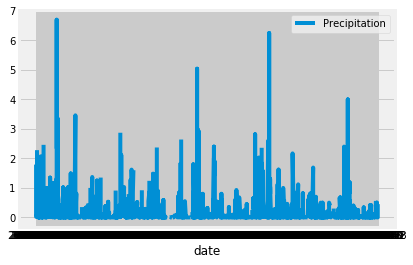

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_row = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_day_in_data = last_row.__dict__

one_year_ago = int(last_day_in_data['date'][:4]) - 1

full_date_one_year_ago = f"{one_year_ago}-{last_day_in_data['date'][5:7]}-{last_day_in_data['date'][8:10]}"

# Perform a query to retrieve the data and precipitation scores
filtered_for_one_year = (session.query(Measurement.date,Measurement.prcp)
                    .filter(Measurement.date >= full_date_one_year_ago)
                    .all())

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(filtered_for_one_year)
measurement_df.set_index(["date"], inplace = True)

# Sort the dataframe by date
sort_by_date = measurement_df.sort_index(ascending = True)
sort_by_date

# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(sort_by_date, label = "Precipitation")
plt.legend()
plt.xlabel("date")
plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [36]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station.station).count()
stations_count

9

In [59]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations= (session.query(Measurement.station,func.count(Measurement.tobs))
     .group_by(Measurement.station)
     .order_by(func.count(Measurement.tobs).desc())
     .all())
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
(session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))
     .filter(Measurement.station == most_active_stations[0][0])
     .all())

[(54.0, 85.0, 71.66378066378067)]

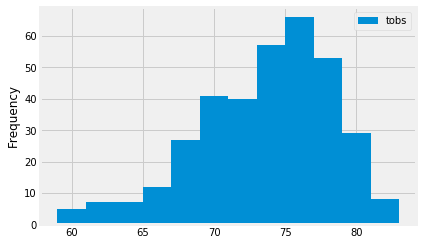

In [93]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_one_year = (session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_stations[0][0])
    .filter(Measurement.date >= full_date_one_year_ago)
    .all())

most_active_station_one_year_df = pd.DataFrame(most_active_station_one_year)
most_active_station_one_year_df

plt.hist(most_active_station_one_year_df['tobs'], bins= 12, label = "tobs")
plt.legend()
plt.ylabel("Frequency")
plt.show()